In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving highblood.csv to highblood.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['highblood.csv']))

In [ ]:
#load the data
data.head()

,s/n,BMI,Waist_Circum,Height,Weight,Smoking,Sitting_Time,exercising,Gender,Age,Work_Vig_Act,Work_Mod_Act,Alcoholic,Job_Type,Num_Hrs_Worked_Wk,High_Blood_Pressure,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,0,58.04,156.3,154.7,138.9,0,720,0,1,62,0,0,0,no_job,0,0,NaN,NaN,NaN,NaN,NaN
1,1,30.05,109.5,167.1,83.9,1,240,0,0,71,0,0,0,no_job,0,1,NaN,NaN,NaN,NaN,NaN
2,2,27.56,95.4,154.4,65.7,0,180,1,0,52,0,1,1,have_job,50,0,NaN,NaN,NaN,NaN,NaN
3,3,23.34,79.5,182.7,77.9,0,300,0,0,21,0,0,1,looking_job,0,0,NaN,NaN,NaN,NaN,NaN
4,4,33.64,117.0,173.8,101.6,1,180,0,0,64,0,0,1,have_job,40,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cleaning data
#we drop s/n, and all the unnamed colunm 

data.drop(['Unnamed: 16'],axis=1,inplace=True)
data.drop(['Unnamed: 18'],axis=1,inplace=True)
data.drop(['Unnamed: 19'],axis=1,inplace=True)
data.drop(['Unnamed: 20'],axis=1,inplace=True)
data.drop(['s/n'],axis=1,inplace=True)

data.head()

,BMI,Waist_Circum,Height,Weight,Smoking,Sitting_Time,exercising,Gender,Age,Work_Vig_Act,Work_Mod_Act,Alcoholic,Job_Type,Num_Hrs_Worked_Wk,High_Blood_Pressure,Unnamed: 17
0,58.04,156.3,154.7,138.9,0,720,0,1,62,0,0,0,no_job,0,0,NaN
1,30.05,109.5,167.1,83.9,1,240,0,0,71,0,0,0,no_job,0,1,NaN
2,27.56,95.4,154.4,65.7,0,180,1,0,52,0,1,1,have_job,50,0,NaN
3,23.34,79.5,182.7,77.9,0,300,0,0,21,0,0,1,looking_job,0,0,NaN
4,33.64,117.0,173.8,101.6,1,180,0,0,64,0,0,1,have_job,40,0,NaN


In [ ]:
data.drop(['Unnamed: 17'],axis=1,inplace=True)

In [ ]:
data.head()

,BMI,Waist_Circum,Height,Weight,Smoking,Sitting_Time,exercising,Gender,Age,Work_Vig_Act,Work_Mod_Act,Alcoholic,Num_Hrs_Worked_Wk,High_Blood_Pressure,Job_Type_enco
0,58.04,156.3,154.7,138.9,0,720,0,1,62,0,0,0,0,0,0.0
1,30.05,109.5,167.1,83.9,1,240,0,0,71,0,0,0,0,1,0.0
2,27.56,95.4,154.4,65.7,0,180,1,0,52,0,1,1,50,0,1.0
3,23.34,79.5,182.7,77.9,0,300,0,0,21,0,0,1,0,0,2.0
4,33.64,117.0,173.8,101.6,1,180,0,0,64,0,0,1,40,0,1.0


In [ ]:
job_dict = {'no_job' : 0, 'have_job' : 1, 'looking_job' : 2}

In [ ]:
data.drop(['Job_Type_enco'],axis=1,inplace=True)


In [ ]:
data.head()

,BMI,Waist_Circum,Height,Weight,Smoking,Sitting_Time,exercising,Gender,Age,Work_Vig_Act,Work_Mod_Act,Alcoholic,Num_Hrs_Worked_Wk,High_Blood_Pressure
0,58.04,156.3,154.7,138.9,0,720,0,1,62,0,0,0,0,0
1,30.05,109.5,167.1,83.9,1,240,0,0,71,0,0,0,0,1
2,27.56,95.4,154.4,65.7,0,180,1,0,52,0,1,1,50,0
3,23.34,79.5,182.7,77.9,0,300,0,0,21,0,0,1,0,0
4,33.64,117.0,173.8,101.6,1,180,0,0,64,0,0,1,40,0


In [ ]:
#missing variables
#total percentage of missing data

missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')


The total percentage of missing data is 0.0%


In [ ]:

# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage


In [ ]:
data.head()

,BMI,Waist_Circum,Height,Weight,Smoking,Sitting_Time,exercising,Gender,Age,Work_Vig_Act,Work_Mod_Act,Alcoholic,Num_Hrs_Worked_Wk,High_Blood_Pressure
0,58.04,156.3,154.7,138.9,0,720,0,1,62,0,0,0,0,0
1,30.05,109.5,167.1,83.9,1,240,0,0,71,0,0,0,0,1
2,27.56,95.4,154.4,65.7,0,180,1,0,52,0,1,1,50,0
3,23.34,79.5,182.7,77.9,0,300,0,0,21,0,0,1,0,0
4,33.64,117.0,173.8,101.6,1,180,0,0,64,0,0,1,40,0


In [ ]:
data.shape

(22024, 14)

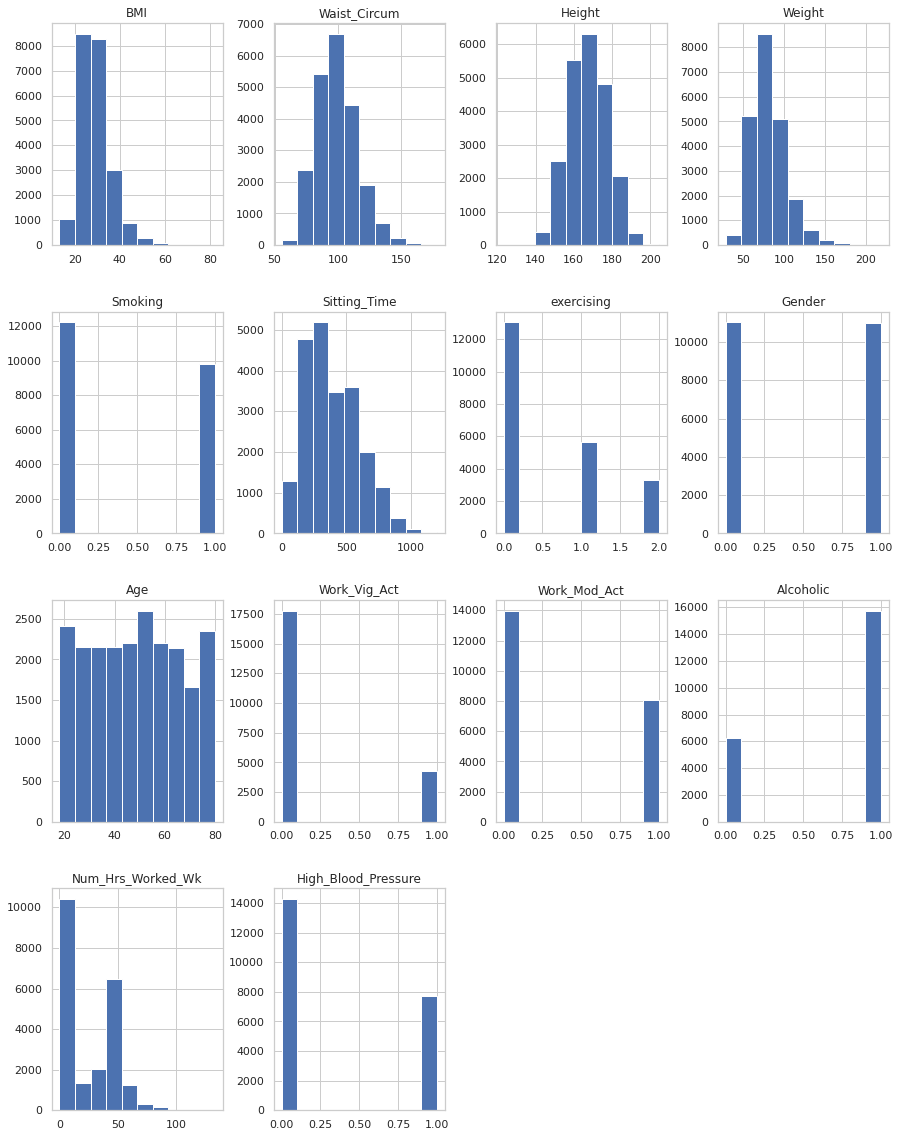

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

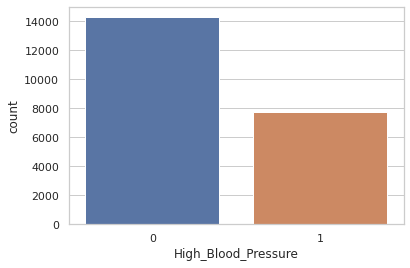

There are 14277 patients without high blood pressure and 7747 patients with high blood pressue


In [ ]:
sns.countplot(x='High_Blood_Pressure',data=data)
plt.show()
cases = data.High_Blood_Pressure.value_counts()
print(f"There are {cases[0]} patients without high blood pressure and {cases[1]} patients with high blood pressue")

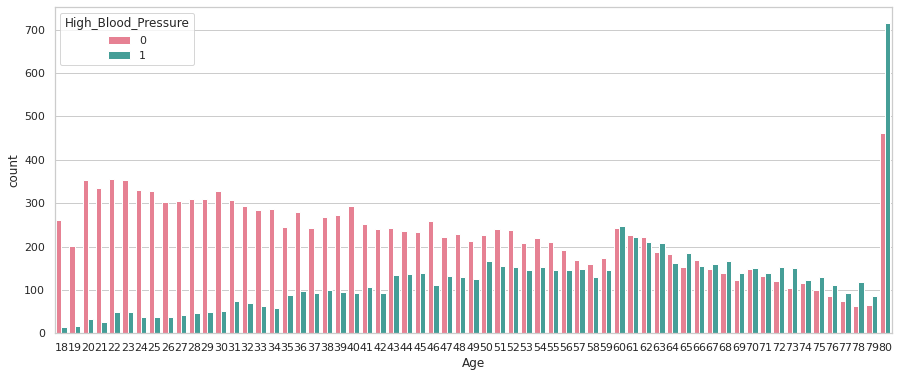

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = data, hue = 'High_Blood_Pressure',palette='husl')
plt.show()

In [ ]:
#The people with the highest risk of developing High Blood Pressure are between the ages of 44 and 80

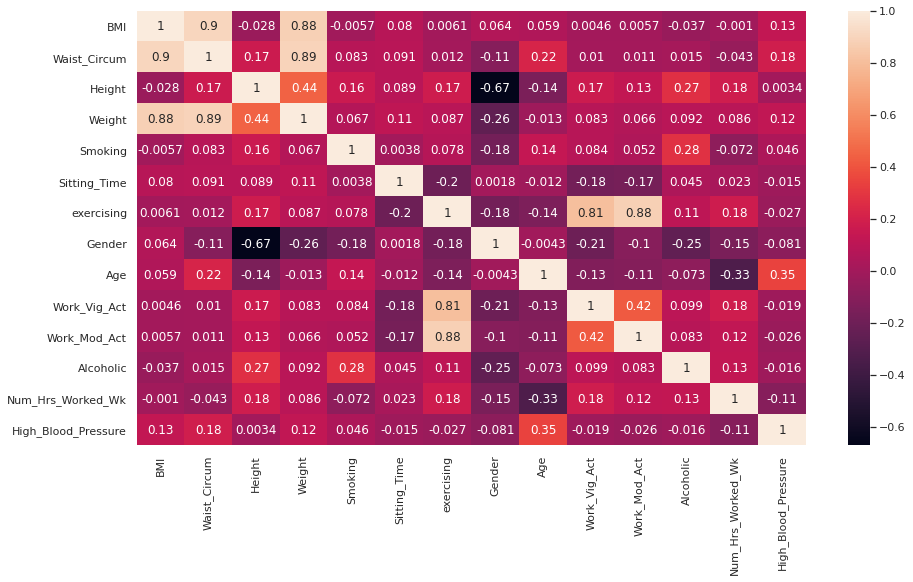

In [ ]:
#Correlation Heat map


plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
#There are no features with more than 0.5 correlation with High blood pressure and this shows that the features a poor predictors

In [ ]:
!pip install Boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

     |████████████████████████████████| 61kB 2.3MB/s 


In [ ]:
#defines the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

#define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

#find all relavant features

feat_selector.fit(X,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	8


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	8


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=50, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7EFF8F552050,
                                          verbose=0, warm_star

In [ ]:
#show the most important features
most_important =data.columns[:-1][feat_selector.support_].tolist()
most_important

['BMI', 'Waist_Circum', 'Height', 'Weight', 'Age']

We see that BMI, Waist circumference, height, weight, and age are selected as the most important features for predicting high blood pressure.

However we will use thee 8 most important features to build our models
  

In [ ]:
#select the top 10 features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['BMI',
 'Waist_Circum',
 'Height',
 'Weight',
 'Smoking',
 'Sitting_Time',
 'exercising',
 'Gender',
 'Age',
 'Num_Hrs_Worked_Wk']

In [ ]:
#Statistic on the top features

import statsmodels.api as sm

In [ ]:
X_top=data[top_features]
y=data['High_Blood_Pressure']

In [ ]:
res=sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.573387
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     High_Blood_Pressure   No. Observations:                22024
Model:                           Logit   Df Residuals:                    22014
Method:                            MLE   Df Model:                            9
Date:                 Fri, 16 Jul 2021   Pseudo R-squ.:                  0.1159
Time:                         09:55:30   Log-Likelihood:                -12628.
converged:                        True   LL-Null:                       -14283.
Covariance Type:             nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
BMI                  -0.0193      0.008     -2.499      0.012      -0.035      -0.004
Waist_Circum         -0.0056      0.003     -1.951      0.051      -0.011    2.71e-05
Height               -0.0224      0.001    -29.341      0.000      -0.024      -0.021
Weight                0.0273      0.002     12.095      0.000       0.023       0.032
Smoking              -0.0595      0.032     -1.877      0.061      -0.122       0.003
Sitting_Time         -0.0003   7.95e-05     -3.714      0.000      -0.000      -0.000
exercising            0.0110      0.022      0.500      0.617      -0.032       0.054
Gender               -0.4039      0.042     -9.689      0.000      -0.486      -0.322
Age                   0.0460      0.001     40.992      0.000       0.044       0.048
Num_Hrs_Worked_Wk     0.0003      0.001      0.418      0.676      -0.001       0.002
=====================================================================================
"""

In [ ]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                         5%       95%  Odds Ratio
BMI                0.966075  0.995833    0.980841
Waist_Circum       0.988792  1.000027    0.994394
Height             0.976405  0.979329    0.977866
Weight             1.023109  1.032189    1.027639
Smoking            0.885487  1.002639    0.942244
Sitting_Time       0.999549  0.999861    0.999705
exercising         0.968405  1.055567    1.011047
Gender             0.615344  0.724568    0.667726
Age                1.044821  1.049432    1.047124
Num_Hrs_Worked_Wk  0.998858  1.001764    1.000310


In [ ]:
#There are no characteristics that split the data well
#Since the dataset is imbalanced i.e for every positive case there are about 6 negative cases. We may end up with a classifier that mostly predicts negative classes thus have a high accuracy but poor specificity or sensitivity. To adress this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
X=data[top_features]
y=data.iloc[:,-1]

In [ ]:
#the numbers before smote
num_before = dict(Counter(y))

#perform smoting

#define pipeline
over =SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#transform the dataset
X_smote, y_smote = pipeline.fit_resample(X,y)

#the number after smote
num_after = dict(Counter(y_smote))

In [ ]:
print(num_before, num_after)

{0: 14277, 1: 7747} {0: 14276, 1: 11421}


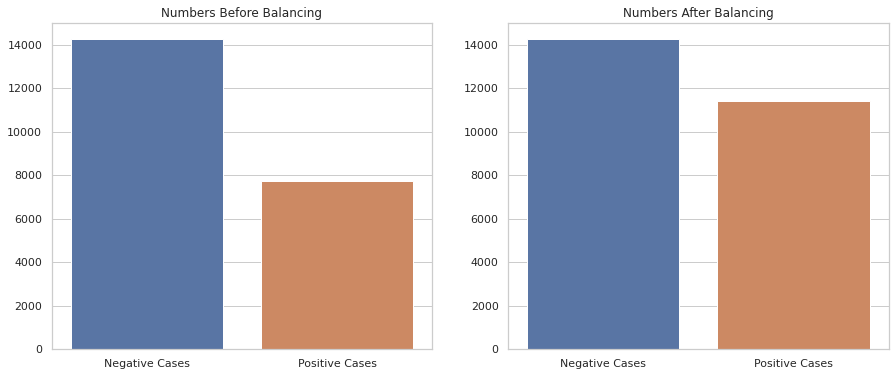

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values())) 
plt.title("Numbers After Balancing")
plt.show() 

In [ ]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['BMI', 'Waist_Circum', 'Height', 'Weight', 'Smoking', 'Sitting_Time', 'exercising', 'Gender','Age', 'Num_Hrs_Worked_Wk', 'High_Blood_Pressure']
new_data.head()

,BMI,Waist_Circum,Height,Weight,Smoking,Sitting_Time,exercising,Gender,Age,Num_Hrs_Worked_Wk,High_Blood_Pressure
0,26.13,83.7,151.9,60.3,1.0,480.0,0.0,1.0,49.0,35.0,0
1,27.80,100.7,157.7,69.1,0.0,480.0,0.0,1.0,80.0,8.0,0
2,29.00,103.3,167.2,81.2,1.0,60.0,0.0,0.0,63.0,0.0,0
3,24.40,99.9,178.0,77.4,0.0,300.0,1.0,0.0,80.0,18.0,0
4,24.00,92.4,181.6,79.1,0.0,180.0,2.0,0.0,61.0,50.0,0


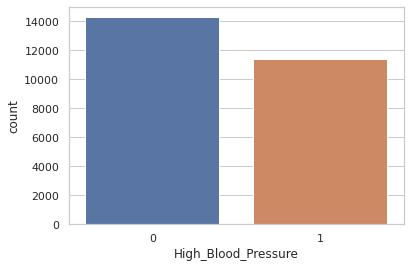

There are 14277 patients without high blood pressure and 7747 patients with high blood pressue


In [ ]:
sns.countplot(x='High_Blood_Pressure',data=new_data)
plt.show()
cases = data.High_Blood_Pressure.value_counts()
print(f"There are {cases[0]} patients without high blood pressure and {cases[1]} patients with high blood pressue")

In [ ]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,BMI,Waist_Circum,Height,Weight,Smoking,Sitting_Time,exercising,Gender,Age,Num_Hrs_Worked_Wk
0,26.13,83.7,151.9,60.3,1.0,480.0,0.0,1.0,49.0,35.0
1,27.80,100.7,157.7,69.1,0.0,480.0,0.0,1.0,80.0,8.0
2,29.00,103.3,167.2,81.2,1.0,60.0,0.0,0.0,63.0,0.0
3,24.40,99.9,178.0,77.4,0.0,300.0,1.0,0.0,80.0,18.0
4,24.00,92.4,181.6,79.1,0.0,180.0,2.0,0.0,61.0,50.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42) 

In [ ]:
#Feature scalling

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, max_features = 'sqrt')
RF_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#prediction
forest_predict = RF_clf.predict(X_test)

In [ ]:
test_score = RF_clf.score(X_test, y_test)
print(test_score*100,"%")

66.77042801556419 %


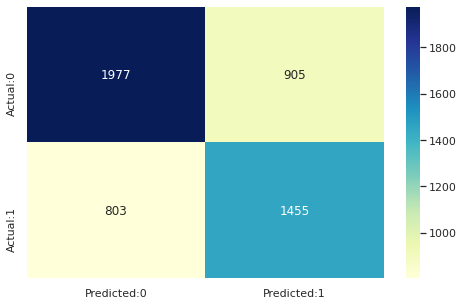

In [ ]:
cm=confusion_matrix(y_test,forest_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1']) 
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,forest_predict))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2882
           1       0.62      0.64      0.63      2258

    accuracy                           0.67      5140
   macro avg       0.66      0.67      0.66      5140
weighted avg       0.67      0.67      0.67      5140



In [ ]:
forest_f1 = f1_score(y_test, forest_predict)
print(f'The f1 score Random Forest is {round(forest_f1*100,2)}%')

The f1 score Random Forest is 63.01%


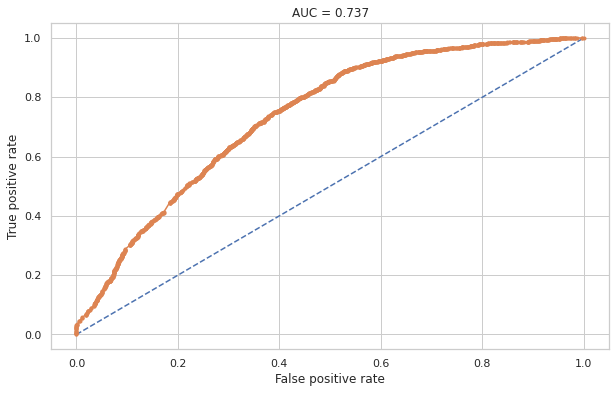

In [ ]:
# ROC curve and AUC 
probs = RF_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
forest_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(forest_auc,3)}")
plt.show()